# Kaggle Playground Series - Season 4, Episode 1

## Bank Churn Prediction Challenge

Welcome to the Kaggle Playground Series - Season 4, Episode 1! This notebook presents a comprehensive solution to the Bank Churn Prediction Challenge. The goal is to predict whether a customer continues with their bank account or closes it (churns).

### Overview

This notebook covers the following key aspects:
- Data Exploration and Visualization
- Data Preprocessing
- Model Selection and Training (XGBoost with Hyperparameter Tuning)
- Model Evaluation (ROC-AUC, Confusion Matrix, Classification Report)
- Predictions on the Test Set
- Visualizations of Predicted Probabilities on the Test Set

### Datasets

- `train.csv`: Training dataset with features and the target variable (`Exited`).
- `test.csv`: Test dataset for making predictions.
- `sample_submission.csv`: Sample submission file in the correct format.

### Dependencies

- pandas
- scikit-learn
- xgboost
- matplotlib
- seaborn

### File Structure

- `bank_churn_prediction.ipynb`: The main Jupyter notebook containing the entire solution.
- `submission.csv`: The submission file containing predicted probabilities for the test set.

### Code Highlights

1. **Data Exploration and Visualization:**
   - Explored the distribution of the target variable and visualized the correlation matrix.

2. **Data Preprocessing:**
   - Handled missing values.
   - Converted categorical variables into numerical format using one-hot encoding.
   - Standardized numerical features.

3. **Model Selection and Training:**
   - Utilized XGBoost for binary classification.
   - Conducted hyperparameter tuning using GridSearchCV.

4. **Model Evaluation:**
   - Evaluated the model on the validation set using ROC-AUC score.
   - Plotted the ROC curve for visual assessment.
   - Visualized the distribution of predicted probabilities on the test set.

5. **Predictions on the Test Set:**
   - Utilized the trained model to make predictions on the test set.
   - Created a submission file in the required format.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load datasets
train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

In [3]:
# Drop unnecessary columns
columns_to_drop = ['id', 'CustomerId', 'Surname', 'Exited']
X = train_data.drop(columns=columns_to_drop)
y = train_data['Exited']

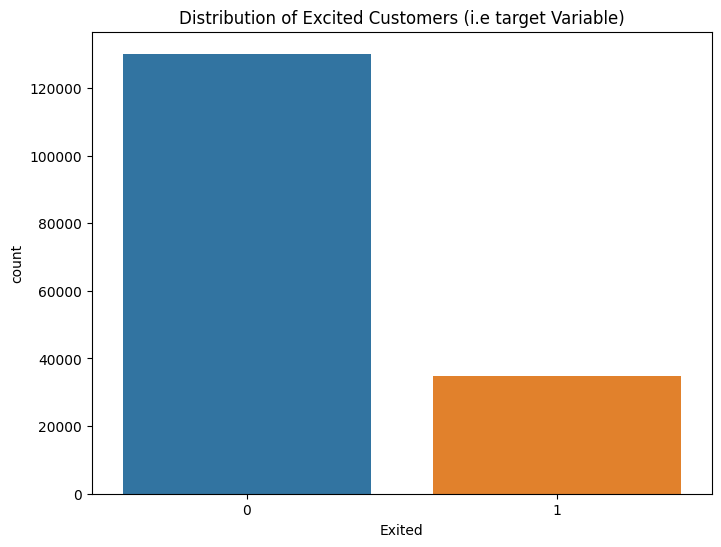

In [4]:
#Exploring the target variable distribution:
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Distribution of Excited Customers (i.e target Variable)")
plt.show()

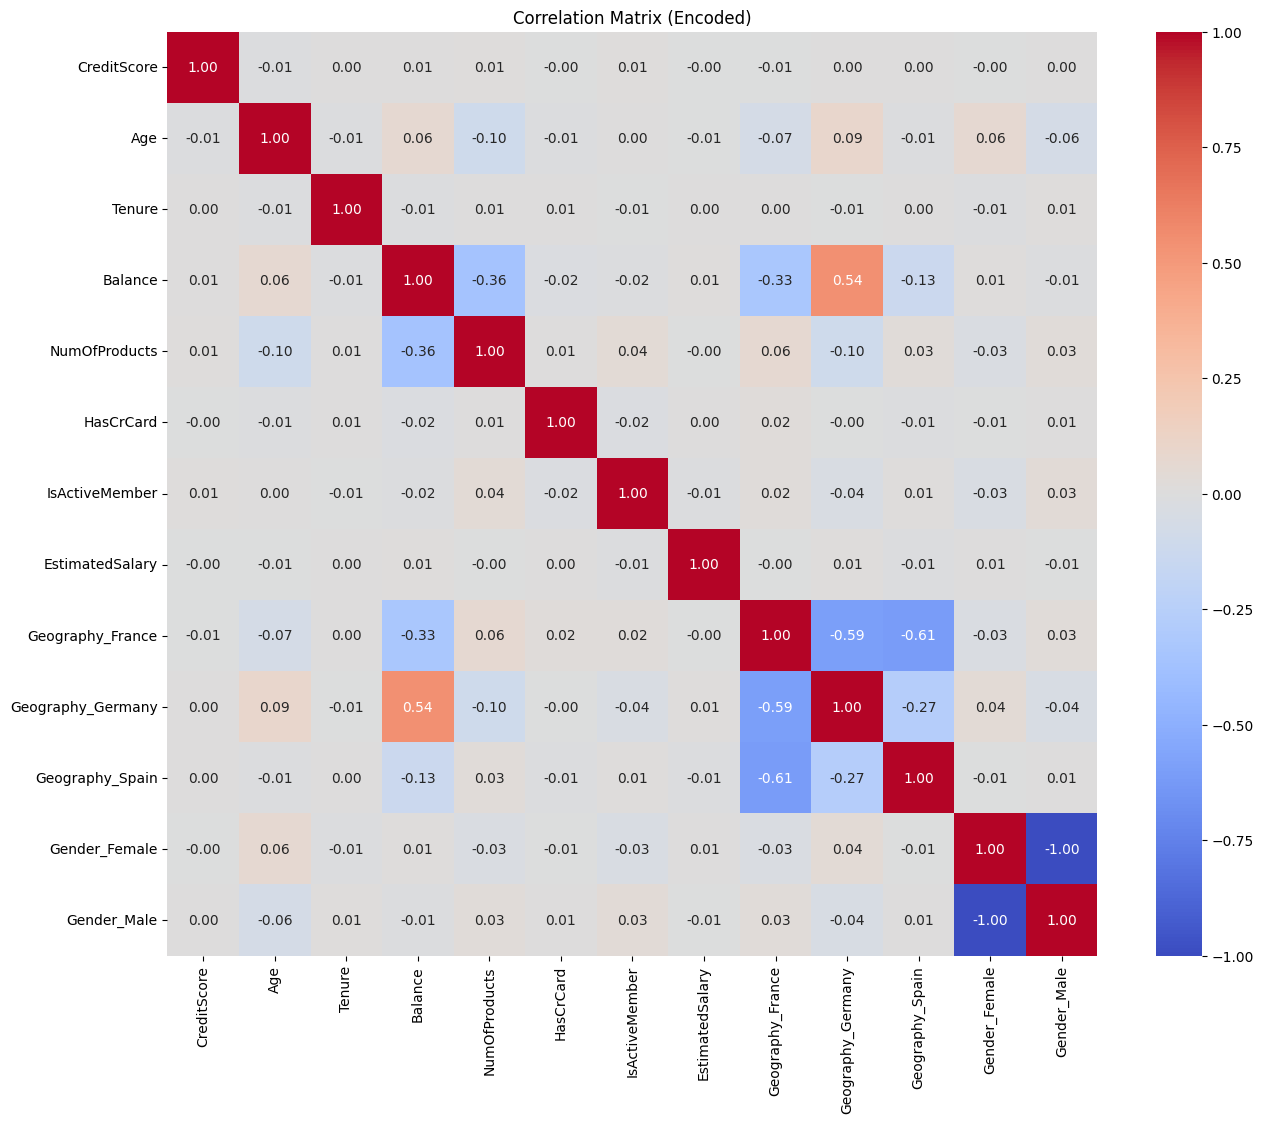

In [5]:
# One-hot encode categorical columns
X_encoded = pd.get_dummies(X)

# Exploring the correlation matrix:
correlation_matrix_encoded = X_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Encoded)")
plt.show()


In [6]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Define preprocessing steps
numeric_features = X.select_dtypes(include=['float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [8]:
# Define the model with hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7]
}

model = xgb.XGBClassifier()

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', model)])

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Geogra...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [9]:
# Best hyperparameters from grid search
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'classifier__max_depth': 3, 'classifier__n_estimators': 100}


In [10]:
# Fit the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Geography', 'Gender'], dtype='object...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

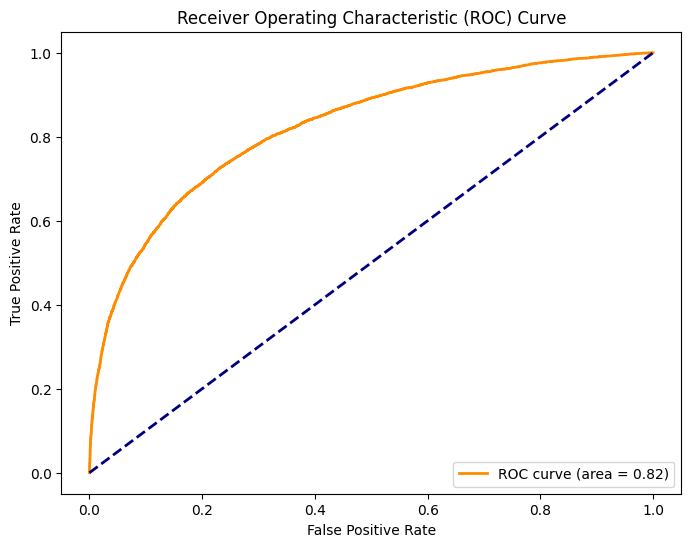

In [11]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report

# Plot ROC curve
y_val_pred_prob = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [12]:
# Predictions on the validation set
y_val_pred_prob = best_model.predict_proba(X_val)[:, 1]

In [13]:
# Evaluate the model
roc_auc = roc_auc_score(y_val, y_val_pred_prob)
print(f'ROC-AUC on the validation set: {roc_auc}')

ROC-AUC on the validation set: 0.8234609032225876


In [14]:
# Make predictions on the test set
X_test = test_data.drop(columns=['id', 'CustomerId', 'Surname'])
test_predictions = best_model.predict_proba(X_test)[:, 1]


In [15]:
# Create submission file
submission_df = pd.DataFrame({'id': test_data['id'], 'Exited': test_predictions})
submission_df.to_csv('/kaggle/working/submission.csv', index=False)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


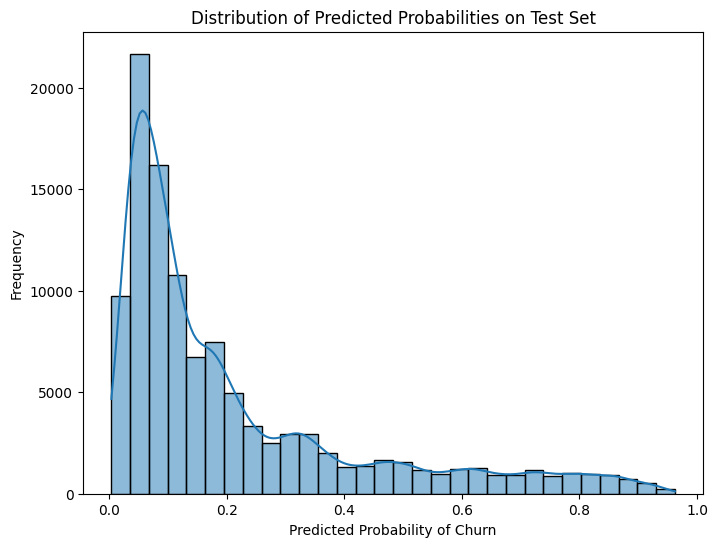

In [16]:
# Visualize predicted probabilities on the test set
plt.figure(figsize=(8, 6))
sns.histplot(test_predictions, kde=True, bins=30)
plt.title('Distribution of Predicted Probabilities on Test Set')
plt.xlabel('Predicted Probability of Churn')
plt.ylabel('Frequency')
plt.show()


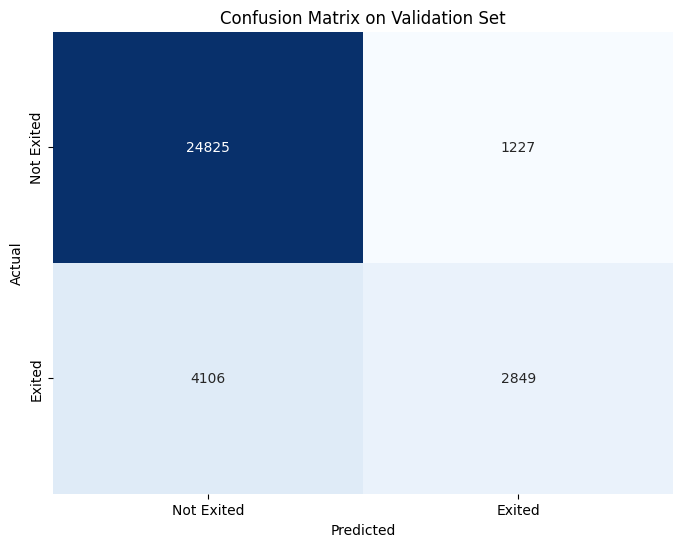

In [17]:
# Visualize a confusion matrix
y_val_pred = best_model.predict(X_val)
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Exited', 'Exited'],
            yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix on Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
# Visualize classification report
print("Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     26052
           1       0.70      0.41      0.52      6955

    accuracy                           0.84     33007
   macro avg       0.78      0.68      0.71     33007
weighted avg       0.82      0.84      0.82     33007

